For readability and brevity of this jupyter file, function definitions are in `displaced_diffusion.py`, `displaced_diffusion.py`, `utils.py`, `sabr.py` and `sabr_y.py`. 

To teammates: As I have referred to various sources of implementations, there might be inconsistencies and duplications of certain functions between SABR and Diffusion parts.

## Displaced-diffusion model

### European Options (SPX)

In [5]:
pip install utils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13936 sha256=5c6134120ffa2120b0127bfad7cd7d6f6cc5b7befc88948680e14493f351de6b
  Stored in directory: c:\users\18251\appdata\local\pip\cache\wheels\b6\a1\81\1036477786ae0e17b522f6f5a838f9bc4288d1016fc5d0e1ec
Successfully built utils
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
from scipy import interpolate
import datetime as dt
from utils import calculate_atm_volatility
from displaced_diffusion import DisplacedDiffusionVolatility

today = dt.date(2020, 12, 1)
# Discount Rate
rate_df = pd.read_csv('zero_rates_20201201.csv')

# SPX General Data
spx_df = pd.read_csv('SPX_options.csv')
spx_df['strike_price'] = spx_df['strike_price'] / 1000
spx_df['mid_price'] = (spx_df['best_bid'] + spx_df['best_offer']) / 2

exdates = np.unique(spx_df.exdate)

for exdate in exdates:
    spx = spx_df[(spx_df.exdate == exdate)]
    exdate = pd.Timestamp(str(exdate)).date()
    T = (exdate - today).days / 365.0
    # Discount Rate Interpolation
    x = rate_df['days']
    y = rate_df['rate']
    f = interpolate.interp1d(x, y)
    r = f(T * 365) / 100

    # Underlying Value & ATM Strike Price
    S = 3662.45
    K = 3660

    # Beta Parameter (Displaced-Diffusion Model)
    beta1 = 0.8
    beta2 = 0.6
    beta3 = 0.4
    beta4 = 0.2
    betas = [beta1, beta2, beta3, beta4]

    sigma = calculate_atm_volatility(spx, S, K, r, T)

    DisplacedDiffusionVolatility(
        spx, S, r, sigma, T, betas,
        title=f'SPX-DisplacedDiffusion-Sigma{sigma}-ExDate{exdate}')


ImportError: cannot import name 'calculate_atm_volatility' from 'utils' (C:\Users\18251\anaconda3\Lib\site-packages\utils\__init__.py)

### American Options (SPY)

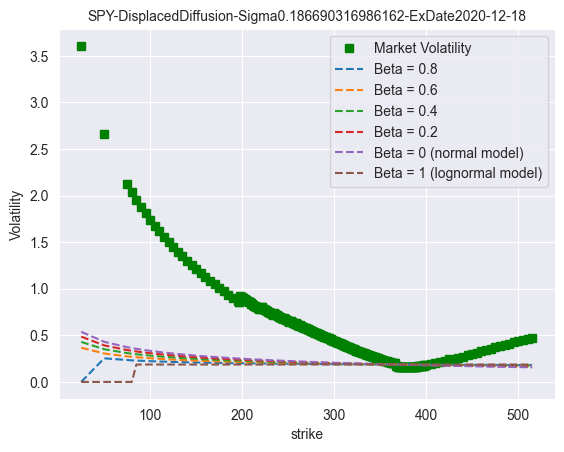

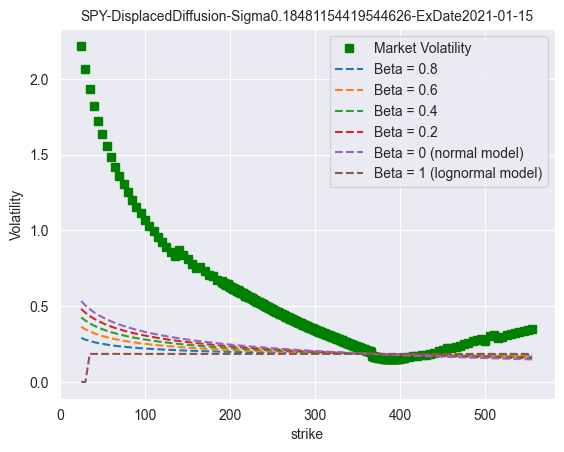

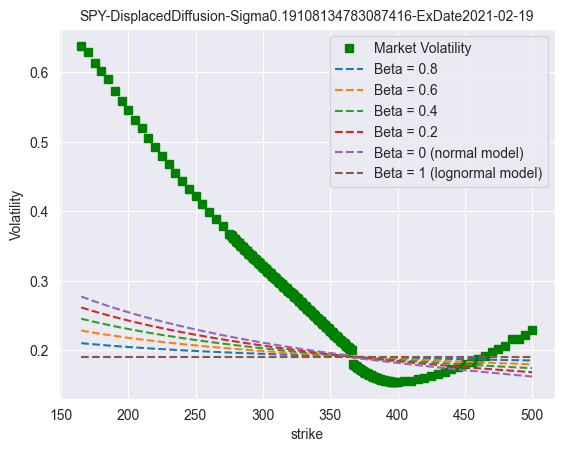

In [9]:
from displaced_diffusion_y import DisplacedDiffusionVolatility_y

today = dt.date(2020, 12, 1)
# Discount Rate
rate_df = pd.read_csv('zero_rates_20201201.csv')

# SPY General Data
spy_df = pd.read_csv('SPY_options.csv')
spy_df['strike_price'] = spy_df['strike_price'] / 1000
spy_df['mid_price'] = (spy_df['best_bid'] + spy_df['best_offer']) / 2

exdates = np.unique(spy_df.exdate)

for exdate in exdates:
    spy = spy_df[(spy_df.exdate == exdate)]
    exdate = pd.Timestamp(str(exdate)).date()
    T = (exdate - today).days / 365.0
    # Discount Rate Interpolation
    x = rate_df['days']
    y = rate_df['rate']
    f = interpolate.interp1d(x, y)
    r = f(T * 365) / 100

    # Underlying Value & ATM Strike Price
    S = 366.02
    K = 366

    # Beta Parameter (Displaced-Diffusion Model)
    beta1 = 0.8
    beta2 = 0.6
    beta3 = 0.4
    beta4 = 0.2
    betas = [beta1, beta2, beta3, beta4]

    sigma = calculate_atm_volatility(spy, S, K, r, T)

    DisplacedDiffusionVolatility_y(spy, S, r, sigma, T, betas,
            title=f'SPY-DisplacedDiffusion-Sigma{sigma}-ExDate{exdate}')



## SABR Model

### European Options (SPX)

C:\Users\wusize\projects\smu_qf\qf620\sabr.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vols'] = df.apply(lambda x: impliedVolatility(S,
C:\Users\wusize\projects\smu_qf\qf620\sabr.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\wusize\projects\smu_qf\qf620\sabr.py:24: RuntimeWarning: invalid value encountered in scalar power
  zhi = np.log((((1 - 2*rho*z + z*z)**0.5) + z - rho)/(1 - rho))
C:\Users\wusize\projects\smu_qf\qf620\sabr.py:24: RuntimeWarning: invalid value encountered in log
  zhi = np.log((((1 - 2*rho*

Calibrated SABR model parameters: alpha = 1.212, beta = 0.7, rho = -0.301, nu = 5.460


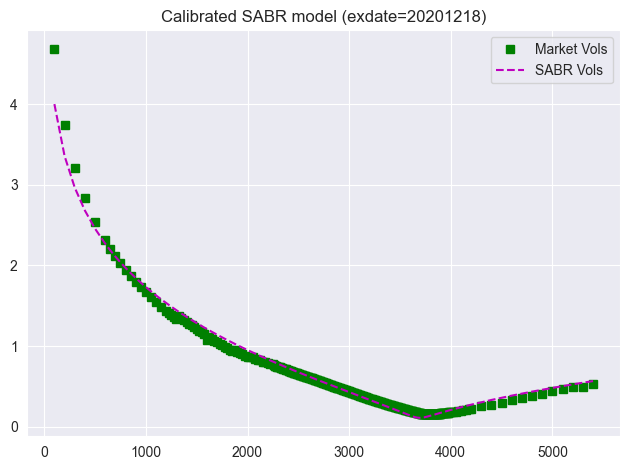

C:\Users\wusize\projects\smu_qf\qf620\sabr.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vols'] = df.apply(lambda x: impliedVolatility(S,
C:\Users\wusize\projects\smu_qf\qf620\sabr.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\wusize\projects\smu_qf\qf620\sabr.py:24: RuntimeWarning: invalid value encountered in log
  zhi = np.log((((1 - 2*rho*z + z*z)**0.5) + z - rho)/(1 - rho))
C:\Users\wusize\projects\smu_qf\qf620\sabr.py:24: RuntimeWarning: invalid value encountered in scalar power
  zhi = np.log((((1 - 2*rho*

Calibrated SABR model parameters: alpha = 1.817, beta = 0.7, rho = -0.404, nu = 2.790


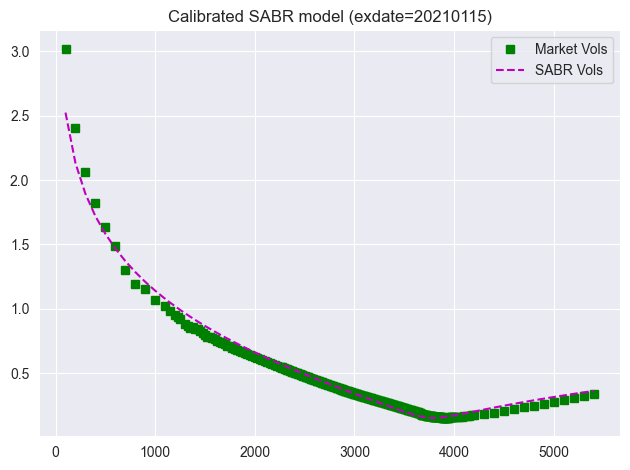

C:\Users\wusize\projects\smu_qf\qf620\sabr.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vols'] = df.apply(lambda x: impliedVolatility(S,
C:\Users\wusize\projects\smu_qf\qf620\sabr.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Calibrated SABR model parameters: alpha = 2.140, beta = 0.7, rho = -0.575, nu = 1.842


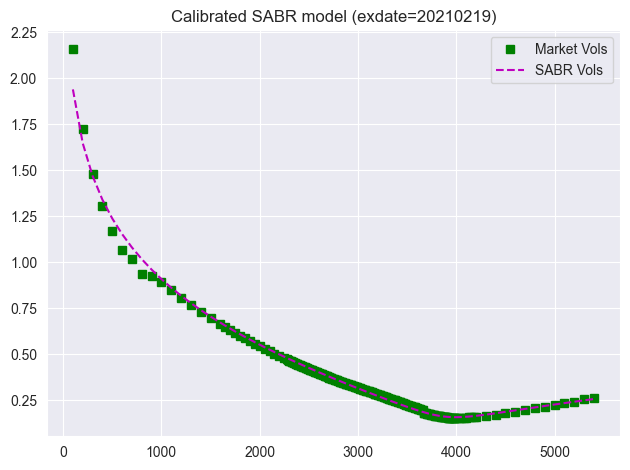

In [10]:
from scipy.interpolate import interp1d
from sabr import calibration
    
spx_df = pd.read_csv('SPX_options.csv')
rates_df = pd.read_csv('zero_rates_20201201.csv')

# mid prices
spx_df['mid'] = 0.5 * (spx_df['best_bid'] + spx_df['best_offer'])

# strike values
spx_df['strike'] = spx_df['strike_price'] * 0.001

# payoff: 'C' -> 'call', 'P' -> put
spx_df['payoff'] = spx_df['cp_flag'].map(lambda x: 'call' if x == 'C' else 'put')

# expiry dates
exdates = sorted(spx_df['exdate'].unique())

# get rates
zero_rate_curve = interp1d(rates_df['days'], rates_df['rate'])  # 构造插值函数
#
for exdate in exdates:
    calibration(df=spx_df, exdate=exdate, beta=0.7,
                zero_rate_curve=zero_rate_curve
                )

### American Options (SPY)

C:\Users\wusize\projects\smu_qf\qf620\sabr_y.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vols'] = df.apply(lambda x: impliedVolatility(S,
C:\Users\wusize\projects\smu_qf\qf620\sabr.py:24: RuntimeWarning: invalid value encountered in scalar power
  zhi = np.log((((1 - 2*rho*z + z*z)**0.5) + z - rho)/(1 - rho))


Calibrated SABR model parameters: alpha = 0.665, beta = 0.7, rho = -0.412, nu = 5.250


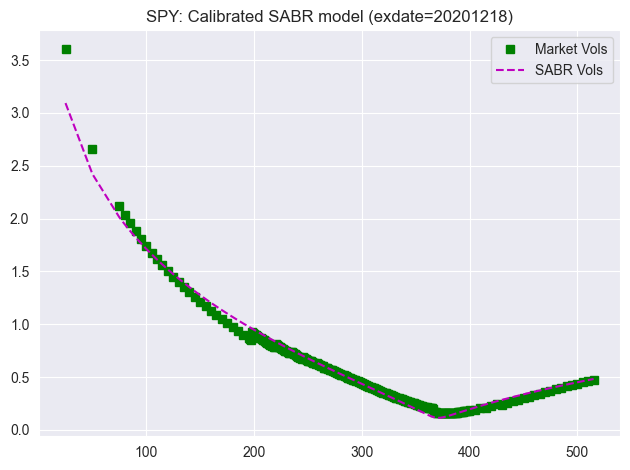

C:\Users\wusize\projects\smu_qf\qf620\sabr_y.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vols'] = df.apply(lambda x: impliedVolatility(S,


Calibrated SABR model parameters: alpha = 0.908, beta = 0.7, rho = -0.489, nu = 2.729


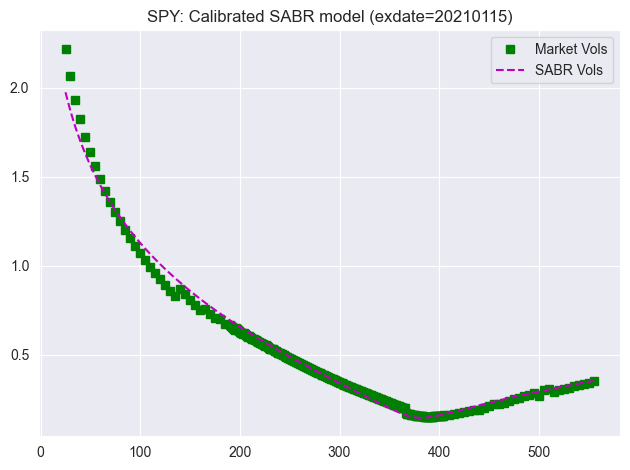

C:\Users\wusize\projects\smu_qf\qf620\sabr_y.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vols'] = df.apply(lambda x: impliedVolatility(S,


Calibrated SABR model parameters: alpha = 1.121, beta = 0.7, rho = -0.633, nu = 1.743


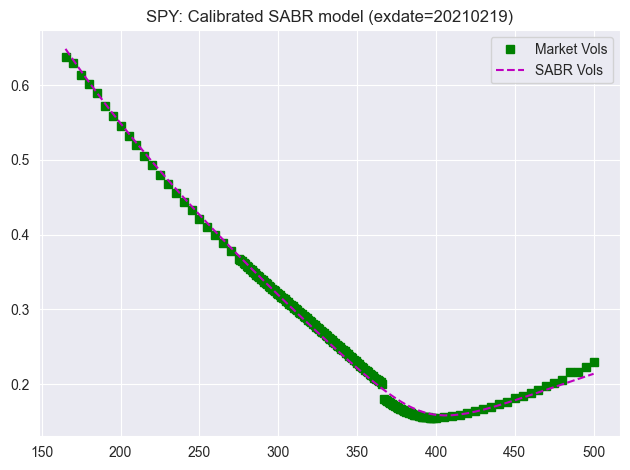

In [11]:
from sabr_y import calibration_y
spy_df = pd.read_csv('SPY_options.csv')
rates_df = pd.read_csv('zero_rates_20201201.csv')

# mid prices
spy_df['mid'] = 0.5 * (spy_df['best_bid'] + spy_df['best_offer'])

# strike values
spy_df['strike'] = spy_df['strike_price'] * 0.001

# payoff: 'C' -> 'call', 'P' -> put
spy_df['payoff'] = spy_df['cp_flag'].map(lambda x: 'call' if x == 'C' else 'put')

# expiry dates
exdates = sorted(spy_df['exdate'].unique())

# get rates
zero_rate_curve = interp1d(rates_df['days'], rates_df['rate'])  # 构造插值函数
#
for exdate in exdates:
    calibration_y(df=spy_df, exdate=exdate, beta=0.7,
                zero_rate_curve=zero_rate_curve,
                S=366.02)